# Trabajo práctico Nro 1

In [52]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, cross_validate

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Levanto el dataset y hago un par de chequeos

hotel_bookings = pd.read_csv('Data/hotel_bookings.csv')

hotel_bookings.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
70618,City Hotel,1,210,2017,June,25,19,1,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,130.00,0,0,Canceled,2017-01-24
6664,Resort Hotel,1,0,2016,June,26,22,0,4,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,1,No Deposit,NaN,NaN,0,Transient,8.00,0,0,Canceled,2016-06-22
55450,City Hotel,1,212,2016,August,33,13,1,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,96.00,0,0,Canceled,2016-08-03
103172,City Hotel,0,0,2016,December,51,13,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,238.0,0,Transient,79.00,0,1,Check-Out,2016-12-14
92120,City Hotel,0,228,2016,June,27,26,2,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,77.23,0,1,Check-Out,2016-07-01
38184,Resort Hotel,0,173,2017,July,27,5,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,135.60,0,3,Check-Out,2017-07-11
133,Resort Hotel,0,0,2015,July,28,5,1,0,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,C,1,No Deposit,306.0,NaN,0,Transient,85.10,0,0,Check-Out,2015-07-06
66495,City Hotel,1,173,2017,April,16,21,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,2,Canceled,2017-03-24
71216,City Hotel,1,158,2017,June,26,29,2,3,3,0.0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,156.06,0,0,Canceled,2017-06-22
34050,Resort Hotel,0,312,2017,March,10,5,2,5,2,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,0,No Deposit,298.0,NaN,0,Transient-Party,56.00,0,0,Check-Out,2017-03-12


In [5]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### a) A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.

In [6]:
# Tipos de datos por columna

hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
# Tomo las variables categóticas y cuento frecuencias

vars_categoricas = hotel_bookings.select_dtypes(exclude=['int64', 'float64']).columns

for v in vars_categoricas:
    df_categorica = pd.DataFrame(hotel_bookings[v].value_counts())
    display(df_categorica)

,hotel
City Hotel,79330
Resort Hotel,40060


,arrival_date_month
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068
November,6794


,meal
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


,country
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MMR,1
BWA,1
BHS,1
NAM,1


,market_segment
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


,distribution_channel
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5


,reserved_room_type
A,85994
D,19201
E,6535
F,2897
G,2094
B,1118
C,932
H,601
P,12
L,6


,assigned_room_type
A,74053
D,25322
E,7806
F,3751
G,2553
C,2375
B,2163
H,712
I,363
K,279


,deposit_type
No Deposit,104641
Non Refund,14587
Refundable,162


,customer_type
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


,reservation_status
Check-Out,75166
Canceled,43017
No-Show,1207


,reservation_status_date
2015-10-21,1461
2015-07-06,805
2016-11-25,790
2015-01-01,763
2016-01-18,625
...,...
2015-03-12,1
2015-02-27,1
2015-02-19,1
2015-01-29,1


#### Falta describir qué representa cada variable y qué tipo tiene entre las opciones que ofrece (categórica, numérica u ordinal)

### b) Reportar si hay valores faltantes. ¿Cuántos son y en qué atributos se encuentran? En caso de haberlos, ¿es necesario y posible asignarles un valor?

In [8]:
# Primero cuento las columnas con NaN

cols_con_faltantes = hotel_bookings.isna().sum()
cols_con_faltantes = cols_con_faltantes[cols_con_faltantes!=0]
cols_con_faltantes

children         4
country        488
agent        16340
company     112593
dtype: int64

##### Children

In [9]:
hotel_bookings[hotel_bookings['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [10]:
hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') &
               (hotel_bookings['arrival_date_year'] == 2015) &
               (hotel_bookings['arrival_date_month'] == 'August') &
               (hotel_bookings['meal'] == 'BB') &
               (hotel_bookings['country'] == 'PRT') &
               (hotel_bookings['distribution_channel'] == 'Undefined')
              ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Parecen ser registros de los primeros donde no se guardaban necesariamente todos los datos. La mayoría parecen ser cancelados por lo que no habría que sacarlos. Al ser pocos no hace falta llenarlos o se podrían imputar con cualquier método

##### Country

In [11]:
faltante_pais =  hotel_bookings[hotel_bookings['country'].isna()]
faltante_pais

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [12]:
# Tomo las variables categóticas y cuento frecuencias relativas

vars_categoricas = hotel_bookings.select_dtypes(exclude=['int64', 'float64']).columns

for v in vars_categoricas:
    df_categorica = pd.DataFrame(hotel_bookings[v].value_counts() / hotel_bookings[v].count())
    display(df_categorica)

,hotel
City Hotel,0.664461
Resort Hotel,0.335539


,arrival_date_month
August,0.116233
July,0.106047
May,0.098760
October,0.093475
April,0.092880
June,0.091624
September,0.088014
March,0.082034
February,0.067577
November,0.056906


,meal
BB,0.773180
HB,0.121141
SC,0.089203
Undefined,0.009791
FB,0.006684


,country
PRT,0.408656
GBR,0.102008
FRA,0.087593
ESP,0.072059
DEU,0.061286
...,...
MMR,0.000008
BWA,0.000008
BHS,0.000008
NAM,0.000008


,market_segment
Online TA,0.473046
Offline TA/TO,0.202856
Groups,0.165935
Direct,0.105587
Corporate,0.044350
Complementary,0.006223
Aviation,0.001985
Undefined,0.000017


,distribution_channel
TA/TO,0.819750
Direct,0.122665
Corporate,0.055926
GDS,0.001617
Undefined,0.000042


,reserved_room_type
A,0.720278
D,0.160826
E,0.054737
F,0.024265
G,0.017539
B,0.009364
C,0.007806
H,0.005034
P,0.000101
L,0.000050


,assigned_room_type
A,0.620261
D,0.212095
E,0.065382
F,0.031418
G,0.021384
C,0.019893
B,0.018117
H,0.005964
I,0.003040
K,0.002337


,deposit_type
No Deposit,0.876464
Non Refund,0.122179
Refundable,0.001357


,customer_type
Transient,0.750591
Transient-Party,0.210436
Contract,0.034140
Group,0.004833


,reservation_status
Check-Out,0.629584
Canceled,0.360307
No-Show,0.010110


,reservation_status_date
2015-10-21,0.012237
2015-07-06,0.006743
2016-11-25,0.006617
2015-01-01,0.006391
2016-01-18,0.005235
...,...
2015-03-12,0.000008
2015-02-27,0.000008
2015-02-19,0.000008
2015-01-29,0.000008


In [13]:
for v in vars_categoricas:
    df_categorica = pd.DataFrame(faltante_pais[v].value_counts() / faltante_pais[v].count()) 
    display(df_categorica)

,hotel
Resort Hotel,0.95082
City Hotel,0.04918


,arrival_date_month
October,0.133197
February,0.114754
January,0.112705
March,0.112705
December,0.106557
April,0.090164
November,0.086066
September,0.084016
July,0.067623
August,0.043033


,meal
BB,0.907787
HB,0.059426
SC,0.024590
Undefined,0.008197


,country


,market_segment
Corporate,0.377049
Direct,0.321721
Online TA,0.151639
Offline TA/TO,0.120902
Complementary,0.018443
Groups,0.010246


,distribution_channel
Corporate,0.381148
Direct,0.331967
TA/TO,0.286885


,reserved_room_type
A,0.805328
E,0.077869
D,0.057377
G,0.022541
P,0.020492
F,0.014344
C,0.002049


,assigned_room_type
A,0.389344
D,0.319672
E,0.139344
C,0.043033
F,0.038934
G,0.028689
P,0.020492
I,0.012295
H,0.008197


,deposit_type
No Deposit,0.971311
Non Refund,0.028689


,customer_type
Transient,0.899590
Transient-Party,0.086066
Group,0.014344


,reservation_status
Check-Out,0.862705
Canceled,0.129098
No-Show,0.008197


,reservation_status_date
2015-09-16,0.028689
2015-06-17,0.018443
2016-02-04,0.014344
2016-01-15,0.014344
2016-04-28,0.014344
...,...
2016-06-09,0.002049
2017-04-13,0.002049
2017-04-14,0.002049
2016-04-05,0.002049


Acá al revés... tienen mucho más frecuencia los no cancelados

In [14]:
faltante_pais.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,154.000000,174.000000,488.0,488.000000,488.000000,488.000000
mean,0.137295,31.741803,2015.897541,26.786885,15.231557,0.612705,2.053279,1.368852,0.026639,0.008197,0.008197,0.081967,1.469262,0.209016,186.454545,175.637931,0.0,60.486824,0.217213,0.487705
std,0.344512,64.022254,0.658037,16.951303,8.882860,1.438543,3.316506,0.539234,0.184923,0.110693,0.090256,0.296181,3.126209,0.525881,106.703614,111.817931,0.0,45.194175,0.412772,0.818079
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.750000,2015.000000,10.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,94.000000,0.0,35.000000,0.000000,0.000000
50%,0.000000,4.000000,2016.000000,28.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,154.000000,0.0,46.500000,0.000000,0.000000
75%,0.000000,16.250000,2016.000000,43.000000,23.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,240.000000,269.000000,0.0,65.000000,0.000000,1.000000
max,1.000000,267.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,3.000000,2.000000,2.000000,1.000000,2.000000,29.000000,4.000000,468.000000,490.000000,0.0,305.000000,1.000000,5.000000


In [15]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Parece que son menos huéspedes (adultos y niños) y que pasan menos noches. Piden comidas en formato Bed & Breakfast. Suelen ser corporativos. Sin depósitos. Menos cancelaciones. Tienen menos reservas a través de agentes y más a través de companias. 

Hipótesis: Son clientes corporativos de empresas multinacionales. Por eso se registra menos el país de origen.

##### Agent y Company

In [16]:
hotel_bookings[(hotel_bookings['agent'].isna()) & (hotel_bookings['agent'].notna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [17]:
hotel_bookings[(hotel_bookings['agent'].notna()) & (hotel_bookings['agent'].isna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


No hay casos en los que estén ambos compos.

Estos campos parecerían indicar el id del agente/compañia a través del cual se hizo la reserva. Un faltante indicaría entonces que la reserva se hizo directa. 

De ser así el caso no sé si conviene dejarlo en nan o poner un cero. Otra opción es crear otra columna que indique si la reserva fue hecha a través de agente, de compañía o directa 

### c) ¿Qué variables se correlacionan más con la cancelación de la reserva? Para las cuatro más correlacionadas, mostrar un scatter plot en el que el eje x corresponda a la variable correlacionada, y el eje y a la cancelación.

In [18]:
#calculo el coeficiente de relación usando pearson
hotel_bookings.corr(method="pearson")


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


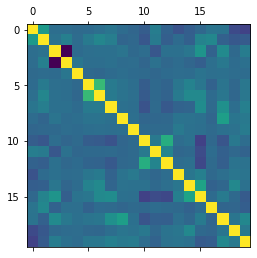

In [19]:
# Correlacion gráfica
plt.matshow(hotel_bookings.corr(method="pearson"))

In [20]:
# 4 variables mas correlacionadas con la cancelacion de la reserva
hotel_bookings.corr(method="pearson")["is_canceled"].sort_values(ascending=False).head()

is_canceled               1.000000
lead_time                 0.293123
previous_cancellations    0.110133
adults                    0.060017
days_in_waiting_list      0.054186
Name: is_canceled, dtype: float64

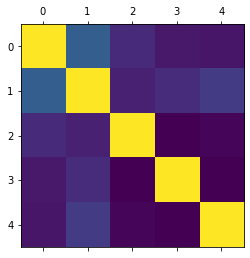

In [21]:
# Visto graficamente las 4 mas correlacionadas
plt.matshow(hotel_bookings.loc[:,["is_canceled","lead_time","previous_cancellations","adults","days_in_waiting_list"]]
            .corr(method="pearson"))



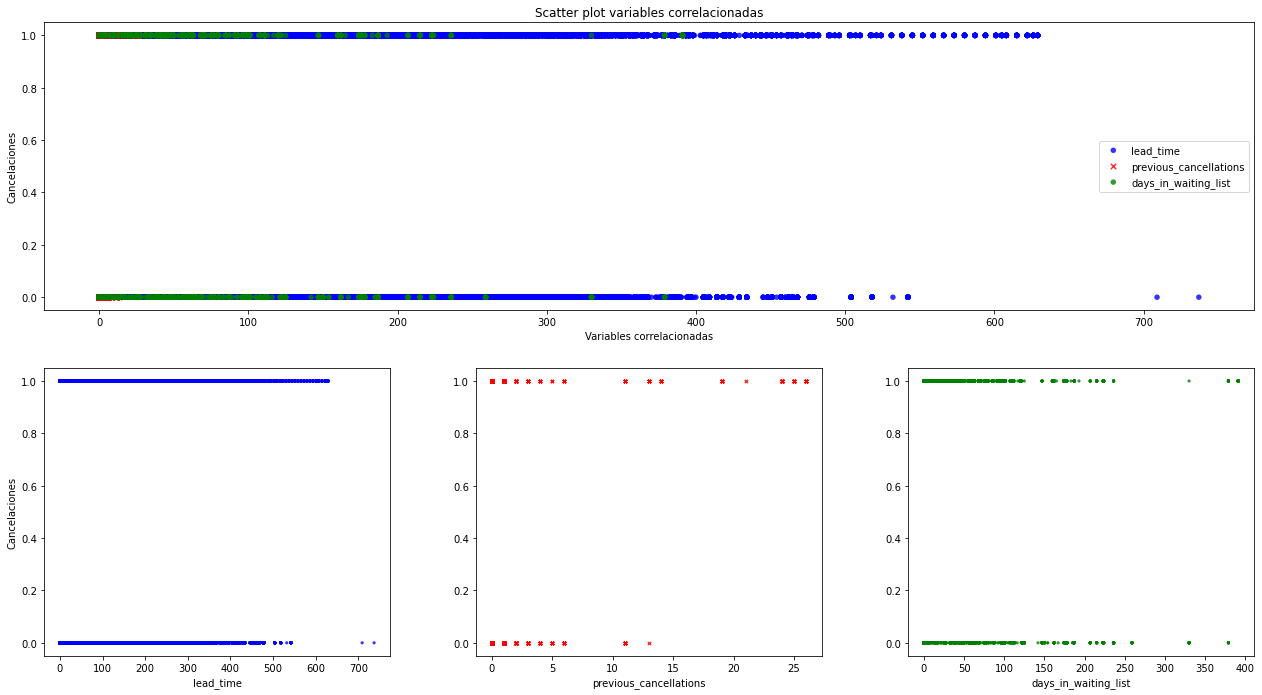

In [22]:
# Scatter plot variables correlacionadas
ejeY = hotel_bookings.loc[:,"is_canceled"]
ejeX = (hotel_bookings.loc[:,"lead_time"], hotel_bookings.loc[:,"previous_cancellations"], hotel_bookings.loc[:,"days_in_waiting_list"])
colors = ("blue", "red", "green")
groups = ("lead_time", "previous_cancellations", "days_in_waiting_list")
marks = ("o","x","o")

# Create plot
fig = plt.figure()
ax = fig.add_axes([0,0,2.8,1])

for data, color, group, mark in zip(ejeX, colors, groups, marks):
    x = data
    ax.scatter(x, ejeY, alpha=0.8, c=color, marker=mark,edgecolors='none', s=30, label=group)

plt.title('Scatter plot variables correlacionadas')
plt.xlabel('Variables correlacionadas') 
plt.ylabel('Cancelaciones') 
plt.legend(loc=5)

ax1 = fig.add_axes([0,-1.2,0.8,1])
ax1.scatter(ejeX[0], ejeY, alpha=0.8, c=colors[0], edgecolors='none', s=10, marker=marks[0])
plt.ylabel('Cancelaciones')
plt.xlabel(groups[0])
ax2 = fig.add_axes([1,-1.2,0.8,1])
ax2.scatter(ejeX[1], ejeY, alpha=0.8, c=colors[1], edgecolors='none', s=10, marker=marks[1])
plt.xlabel(groups[1])
ax3 = fig.add_axes([2,-1.2,0.8,1])
ax3.scatter(ejeX[2], ejeY, alpha=0.8, c=colors[2], edgecolors='none', s=10, marker=marks[2])
plt.xlabel(groups[2])


plt.show()


### d) El dueño de un hotel les solicita que predigan con cierta antelación si un cliente cancelará su reserva. ¿Qué atributos utilizará como variables predictoras? ¿Por qué?

In [23]:
#Eliminacion de variables por no tenerlas al momento de predecir y por ser de tiempo

# porque descartamos - required car parking spaces
print(len(hotel_bookings[(hotel_bookings.is_canceled==1)&(hotel_bookings.required_car_parking_spaces!=0)]))

#descarte de columnas
variables_desc=['arrival_date_year','reservation_status','reservation_status_date','required_car_parking_spaces']

hotel_bookings.drop(variables_desc, inplace=True, axis=1)

0


In [24]:
#Creacion de variables

#Estadia total

hotel_bookings['total_stay']=hotel_bookings.stays_in_week_nights+hotel_bookings.stays_in_weekend_nights
print(len(hotel_bookings[(hotel_bookings.total_stay==0)]))

#que hacer con casos donde el total_stay=0

715


In [25]:
#cantidad total de personas
hotel_bookings['cant_personas']=hotel_bookings.adults+hotel_bookings.children+hotel_bookings.babies

print(len(hotel_bookings[(hotel_bookings.cant_personas==0)]))
#hay campos con cantidad de personas en 0 - le asigno a 1 adulto
hotel_bookings['adults']=np.where(hotel_bookings.cant_personas==0,1,hotel_bookings.adults)

180


In [26]:
# usos los datos de familia para arma una categorica

#Inicialmente lo arbi bastante pero algunas categorias tenian muy poca frecuencia
#0-Solo;1-Solo_adultos ; 2- Adultos con chicos; 3- Familia completo ; 4-Adultos con bebes
hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                        np.where((hotel_bookings.babies>0)&(hotel_bookings.children==0),4,
                                                   (np.where((hotel_bookings.babies==0)&(hotel_bookings.children>0),2,
                                                              3)))))


In [27]:
#Tipo de familia con solo 3 clases
#0-Solo;1-Solo_adultos ;  2- Familia completo 

hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                         2))
                                                                      

In [28]:
#Tipo de familia con solo 3 clases
#0-Solo;1-Solo_adultos ;  2- Familia completo 

hotel_bookings['tipo_familia']=np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults==1),0,
                                        np.where((hotel_bookings.babies+hotel_bookings.children==0)&(hotel_bookings.adults>1),1,
                                         2))
                                                                      

In [29]:
df_categorica = pd.DataFrame(hotel_bookings.tipo_familia.value_counts() / hotel_bookings.tipo_familia.count()) 
df_categorica.head()

,tipo_familia
1,0.731192
0,0.190611
2,0.078198


In [30]:
hotel_bookings['dif_tipo_hab']=np.where((hotel_bookings.assigned_room_type!=hotel_bookings.reserved_room_type),1,0)

df_categorica = pd.DataFrame(hotel_bookings.dif_tipo_hab.value_counts() / hotel_bookings.dif_tipo_hab.count()) 
df_categorica.head()


,dif_tipo_hab
0,0.875057
1,0.124943


c) ¿Qué variables se correlacionan más con la cancelación de la reserva? Para las cuatro más correlacionadas, mostrar un scatter plot en el que el eje x corresponda a la variable correlacionada, y el eje y a la cancelación - Vuelvo a hacer para descartar variables eliminadas e incluir  nuevas

In [31]:
target = 'is_canceled'

In [32]:
#Correlacion Pearson para continuas

corr = hotel_bookings.corr()
corr['correlacion_absoluta'] = corr[target].apply(lambda x: abs(x))
corr[['correlacion_absoluta', target]].sort_values(by = 'correlacion_absoluta', ascending = False)

,correlacion_absoluta,is_canceled
is_canceled,1.000000,1.000000
lead_time,0.293123,0.293123
dif_tipo_hab,0.247770,-0.247770
total_of_special_requests,0.234658,-0.234658
booking_changes,0.144381,-0.144381
previous_cancellations,0.110133,0.110133
is_repeated_guest,0.084793,-0.084793
agent,0.083114,-0.083114
adults,0.059131,0.059131
previous_bookings_not_canceled,0.057358,-0.057358


In [33]:
#correlacion phik para continuas y categoricas

#pip install phik
import phik
from phik import resources, report

# get the phi_k correlation matrix between all variables
hotel_bookings.phik_matrix()


interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stay', 'cant_personas', 'tipo_familia', 'dif_tipo_hab']


c:\users\juan.miguel.ferraro\appdata\local\programs\python\python37\lib\site-packages\phik\data_quality.py:58: UserWarning: The number of unique values of variable country is very large: 177. Are you sure this is not an interval variable? Analysis for pairs of variables including country might be slow.
  .format(col, df[col].nunique())


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,total_stay,cant_personas,tipo_familia,dif_tipo_hab
hotel,1.000000,0.212751,0.123049,0.090403,0.085150,0.038974,0.257967,0.423310,0.019182,0.037799,0.039847,0.259230,0.372887,0.195468,0.152887,0.078910,0.063403,0.021981,0.419995,0.501769,0.051995,0.106646,0.954119,0.641990,0.086801,0.077936,0.000000,0.063391,0.427624,0.011937,0.033882,0.227108
is_canceled,0.212751,1.000000,0.366321,0.089673,0.086808,0.034018,0.028853,0.033169,0.017446,0.022998,0.027676,0.040980,0.442836,0.355050,0.144750,0.132648,0.060068,0.053943,0.095427,0.261288,0.063193,0.298108,0.112710,0.184915,0.067657,0.205441,0.000000,0.368464,0.032178,0.010706,0.051306,0.379386
lead_time,0.123049,0.366321,1.000000,0.303891,0.395902,0.115591,0.201571,0.226790,0.039750,0.067140,0.016841,0.211345,0.281543,0.341604,0.271544,0.175080,0.076477,0.054809,0.155689,0.146612,0.035246,0.413454,0.131955,0.705887,0.250246,0.201458,0.000000,0.108526,0.225102,0.036073,0.217634,0.186426
arrival_date_month,0.090403,0.089673,0.303891,1.000000,0.949651,0.128351,0.109364,0.119486,0.024738,0.125681,0.029895,0.160455,0.272579,0.204178,0.124313,0.096149,0.074890,0.040961,0.108229,0.094251,0.023363,0.221168,0.194628,0.467257,0.140509,0.218863,0.001625,0.133550,0.115360,0.020114,0.319347,0.137133
arrival_date_week_number,0.085150,0.086808,0.395902,0.949651,1.000000,0.291978,0.143229,0.163419,0.014160,0.150847,0.033949,0.191554,0.249797,0.171656,0.154460,0.098223,0.058077,0.055857,0.137103,0.067636,0.019443,0.167471,0.246556,0.557995,0.122536,0.175880,0.000992,0.098657,0.158225,0.015021,0.227587,0.134116
arrival_date_day_of_month,0.038974,0.034018,0.115591,0.128351,0.291978,1.000000,0.065805,0.055841,0.000000,0.024399,0.009430,0.108637,0.159976,0.070414,0.065711,0.018229,0.055418,0.008284,0.035514,0.027153,0.028762,0.080230,0.115421,0.416019,0.091135,0.053335,0.000000,0.023668,0.052998,0.007995,0.052068,0.027431
stays_in_weekend_nights,0.257967,0.028853,0.201571,0.109364,0.143229,0.065805,1.000000,0.982797,0.000000,0.068211,0.023223,0.146222,0.260138,0.128650,0.132348,0.106945,0.003634,0.030336,0.172467,0.121095,0.584874,0.122615,0.161165,0.188518,0.030676,0.146860,0.000000,0.065782,0.987744,0.000000,0.156990,0.098806
stays_in_week_nights,0.423310,0.033169,0.226790,0.119486,0.163419,0.055841,0.982797,1.000000,0.006775,0.067394,0.035288,0.205197,0.280465,0.111335,0.072047,0.064539,0.021553,0.000000,0.214523,0.140540,0.484923,0.132744,0.232157,0.248186,0.031773,0.178175,0.000000,0.053405,0.997769,0.015024,0.116054,0.076158
adults,0.019182,0.017446,0.039750,0.024738,0.014160,0.000000,0.000000,0.006775,1.000000,0.000000,0.000000,0.000000,0.000000,0.014878,0.012189,0.000000,0.000000,0.000000,0.004862,0.000000,0.000000,0.000000,0.040264,NaN,0.000000,0.138255,0.000000,0.000000,0.010210,0.977025,0.000000,0.000000
children,0.037799,0.022998,0.067140,0.125681,0.150847,0.024399,0.068211,0.067394,0.000000,1.000000,0.067405,0.098665,0.136281,0.155739,0.114663,0.028237,0.000000,0.003853,0.691171,0.499176,0.042361,0.097470,0.138301,0.065612,0.030901,0.074531,0.000000,0.089839,0.063090,0.504204,0.695179,0.042276


### e) ¿Se encuentra balanceado el conjunto de datos que utilizará para desarrollar el algoritmo diseñado para contestar el punto d)? En base a lo respondido, ¿qué métricas de performance reportaría y por qué?

In [34]:
freqs = hotel_bookings['is_canceled'].value_counts() / hotel_bookings['is_canceled'].count()
freqs

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

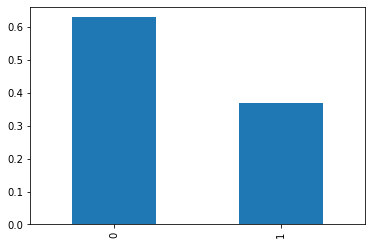

In [35]:
fig, ax = plt.subplots()
freqs.plot(ax=ax, kind='bar')

#### El dataset está desbalanceado 63/37, por lo que no utilizaríamos una métrica como el Accuracy. Las métricas que eligiríamos pueden ser el Recall y la Precision. O, si queremos combinar todo en una sóla métrica, usaríamos Fβ o el área bajo la curva ROC (AUC).

### f) Suponiendo que al dueño del hotel le importa detectar todas las cancelaciones. ¿Qué medida de performance utilizaría? Si utiliza Fβ-Score, ¿qué valor de β eligiría?

#### En este caso tendría que darle más importancia al Recall que a la Precision, es decir, aceptar más falsos positivos con tal de encontrar una mayor cantidad de verdaderos positivos. La β que elegiríamos en este caso tendría que ser mayor que 1, así que usaremos el F2, que es el valor que más se utiliza

### g) Implementar el algoritmo introducido en el punto d) utilizando árboles de decisión. En primer lugar, se deberá separar un 20% de los datos para usarlos como conjunto de evaluación (test set). El conjunto restante (80%) es el de desarrollo y es con el que se deberá continuar haciendo el trabajo. Realizar los siguientes puntos:

#### 1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas.

In [36]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,total_of_special_requests,total_stay,cant_personas,tipo_familia,dif_tipo_hab
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.857911,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.571363,3.427900,1.968229,0.887587,0.124943
std,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.575718,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.792798,2.557439,0.722400,0.506136,0.330656
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,2.000000,2.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,3.000000,2.000000,1.000000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,1.000000,4.000000,2.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,5.000000,69.000000,55.000000,2.000000,1.000000


In [37]:
# Uso las variables numéricas que tenemos hasta ahora, luego podríamos crear más. Por ej, el tipo de hotel
columnas = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 
            'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stay', 'cant_personas', 'tipo_familia', 
            'dif_tipo_hab']

In [76]:
arbol = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, ccp_alpha=0)
metricas_train=[]

#Uso f2
f2_train=[]
f2_test=[]

#Parece que el decissiontreeclassifier no acepta nan, lo voy a llenar rápido pero deberíamos llenarlos bien
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(hotel_bookings[columnas].fillna(0), 
                                                        hotel_bookings['is_canceled'], test_size=0.2, 
                                                        random_state=i,stratify=hotel_bookings['is_canceled'])
    arbol.fit(X_train,y_train)
    y_pred_test = arbol.predict(X_test)
    y_pred_train = arbol.predict(X_train)

    f2_train.append(fbeta_score(y_train,y_pred_train,beta=2))
    f2_test.append(fbeta_score(y_test,y_pred_test,beta=2))

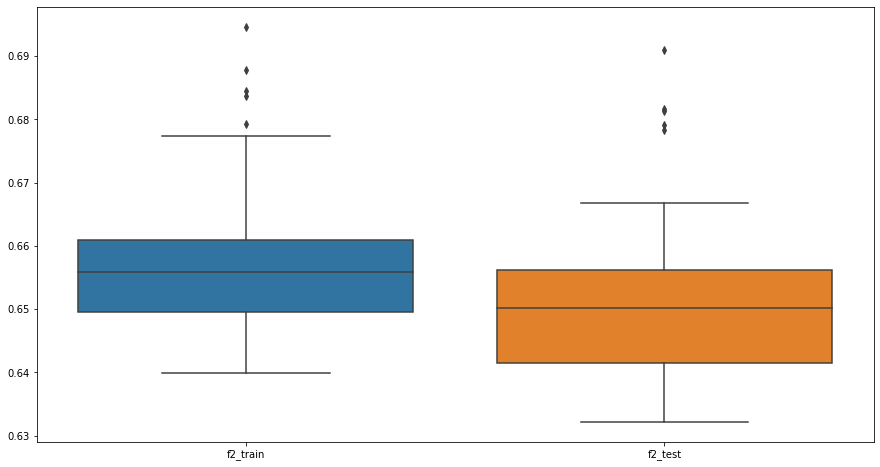

In [77]:
metricas = pd.DataFrame({'f2_train': f2_train, 'f2_test' : f2_test})

plt.figure(figsize=(15,8))
sns.boxplot(data=metricas)

##### Vemos que está ligeramente sobreajustando, obtenemos mejores resultados en train

#### 2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

In [78]:
arbol_cv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, ccp_alpha=0)
X, y = hotel_bookings[columnas].fillna(0), hotel_bookings['is_canceled']
f2_score = make_scorer(fbeta_score, beta=2)

cv_results = cross_validate(arbol_cv, X, y, cv=50, scoring=f2_score, return_train_score=True, n_jobs=-1, return_estimator=True)

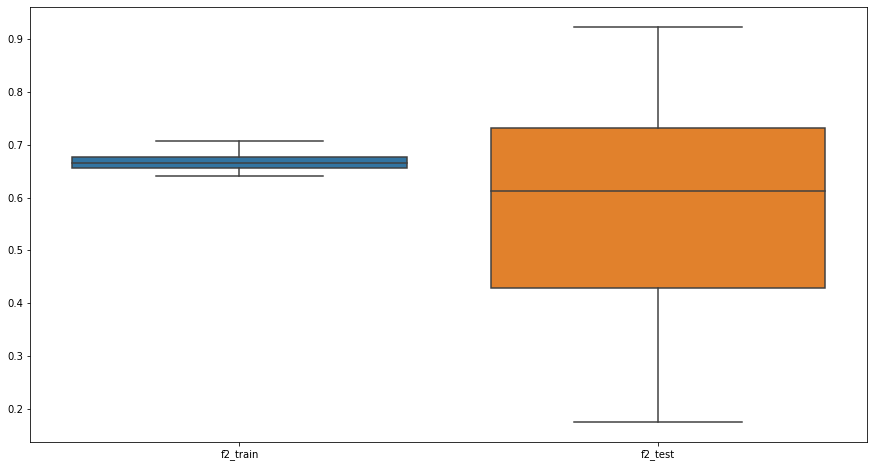

In [79]:
metricas = pd.DataFrame({'f2_train': cv_results['train_score'], 'f2_test' : cv_results['test_score']})

plt.figure(figsize=(15,8))
sns.boxplot(data=metricas)

##### Parece dar mejor en train pero peor en test y con mucha dispersión. Esto puede ser porque tenemos muy pocas muestras en test: 2% vs. al 20% que teníamos en el ejercicio anterior

### h) Graficar el árbol de decisión con mejor performance encontrado en el punto g2). Analizar el árbol de decisión armado (atributos elegidos y decisiones evaluadas).

In [80]:
# Elijo el mejor modelo con los resultados de test
best_model_index = np.argmax(cv_results['test_score'], axis=0)
best_model = cv_results['estimator'][best_model_index]

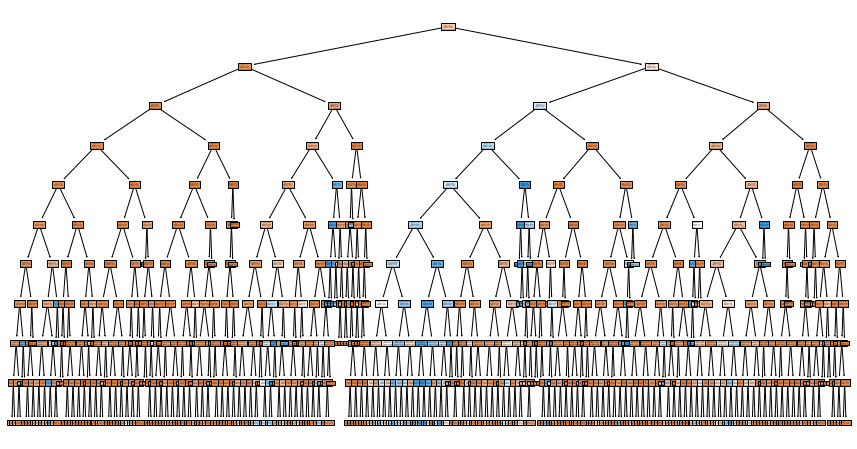

In [81]:
plt.figure(figsize=(15,8))

plot = tree.plot_tree(best_model, filled=True)

### i) Usando validación cruzada de 10 iteraciones (10-fold cross validation), probar distintos valores de α del algoritmo de poda mínima de complejidad de costos (algoritmo de poda de sklearn). Hacer gráficos de la performance en validación y entrenamiento en función del α. Explicar cómo varía la profundidad de los árboles al realizar la poda con distintos valores de α.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hotel_bookings[columnas].fillna(0), 
                                                        hotel_bookings['is_canceled'], test_size=0.2, 
                                                        random_state=42,stratify=hotel_bookings['is_canceled'])